## Prérequis :
- Avoir installé rust
- Avoir installé maturin (pip install maturin)
- Avoir crée et activé un environnement virtuel python (`python -m venv venv && source venv/bin/activate`)

## Compilation (test)
```bash
maturin develop
```
> A executer à chaque modification du code rust dans l'environnement virtuel python

## Compilation (release)
```bash
maturin build
pip install target/wheel/*.whl
```
> A executer pour compiler le code rust en release

# Usage
Le module installé a en python un nom correspondant a la propriété `lib.name` du fichier `Cargo.toml` 
ex :
```
[package]
name = "ProjetAnnuel"
version = "0.1.0"
edition = "2021"

[lib]
name = "projetannuel"
crate-type = ["cdylib"]

[dependencies]
pyo3 = {version= "0.24.0", features = ["extension-module"] }
```

Le module python s'appellera `projetannuel` et sera importable en python avec `import projetannuel`

In [1]:
import projetannuel

In [2]:
import pandas as pd

# Classification Linéaire

In [3]:
df = pd.read_csv("../data/BankNote_Authentication.csv", sep=',')

df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
import numpy as np
np.random.seed(0)

def split_dataframe(df, test_ratio=0.2, seed=42):
    np.random.seed(seed)
    shuffled_indices = np.random.permutation(len(df))
    test_set_size = int(len(df) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return df.iloc[train_indices], df.iloc[test_indices]

train_df, test_df = split_dataframe(df, test_ratio=0.2)

In [5]:
Y_train = [ x for x in train_df["class"] ]
print(f"Y_train len : {len(Y_train)}")
Y_test = [x for x in test_df["class"]]
print(f"Y_test len : {len(Y_test)}")
Y_train = projetannuel.float_labels(Y_train)

Y_train len : 1098
Y_test len : 274


In [6]:
X = train_df[['variance', 'skewness', 'curtosis', 'entropy']].values

In [7]:
model = projetannuel.LinearModel(
    X,
    Y_train,
)

model

In [8]:
model.train_classification(10_000, 0.001, algo = "gradient-descent")

In [9]:
Y_pred = []

for v in test_df[['variance', 'skewness', 'curtosis', 'entropy']].values:
    pred = model.predict(v)
    # pred_proba = model.predict_proba(v)
    Y_pred.append(pred)
# print(pred_proba)

In [10]:
projetannuel.accuracy_score(Y_pred, Y_test)

0.948905109489051

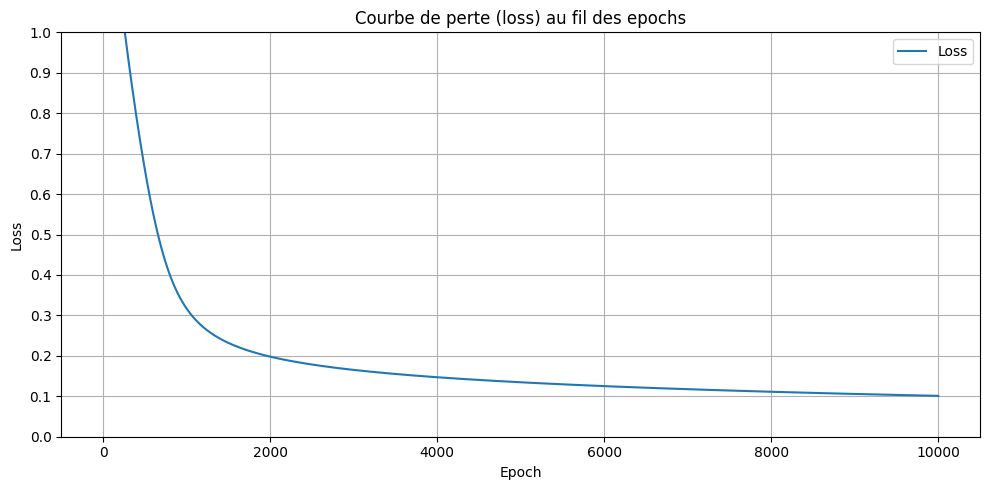

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
model.save("test.json")

In [13]:
m = projetannuel.LinearModel.load("test.json")

In [15]:
Y_pred_2 = []
for v in test_df[['variance', 'skewness', 'curtosis', 'entropy']].values:
    pred = m.predict(v)
    # pred_proba = model.predict_proba(v)
    Y_pred_2.append(pred)

In [20]:
print(Y_pred_2 == Y_pred)

True


# Régression Linéaire

In [ ]:
df = pd.read_csv("../data/swedish_insurance.csv", sep=',')

df

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


In [ ]:
train_df, test_df = split_dataframe(df, test_ratio=0.2)

In [ ]:
Y_train = [ x for x in train_df["Y"] ]
print(f"Y_train len : {len(Y_train)}")
Y_test = [x for x in test_df["Y"]]
print(f"Y_test len : {len(Y_test)}")
Y_train = projetannuel.float_labels(Y_train)

Y_train len : 51
Y_test len : 12


In [ ]:
X = train_df[['X']].values

In [ ]:
model = projetannuel.LinearModel(
    X,
    Y_train
)

model

In [ ]:
model.train_regression()

In [ ]:
Y_pred = []

for v in test_df[['X']].values:
    pred = model.predict(v)
    Y_pred.append(pred)

In [ ]:
print(f"MSE : {projetannuel.mean_squared_error(Y_pred, Y_test)}")
print(f"RMSE : {projetannuel.root_mean_squared_error(Y_pred, Y_test)}")

MSE : 866.202340832026
RMSE : 29.431315649016202
